In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import pickle

In [2]:
df = pd.read_csv("D:/Data Science Projects/Student Grade App/student/student-mat.csv", sep=';')

In [3]:
print(df.shape)
print(df.info())
print(df.isnull().sum())

(395, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  

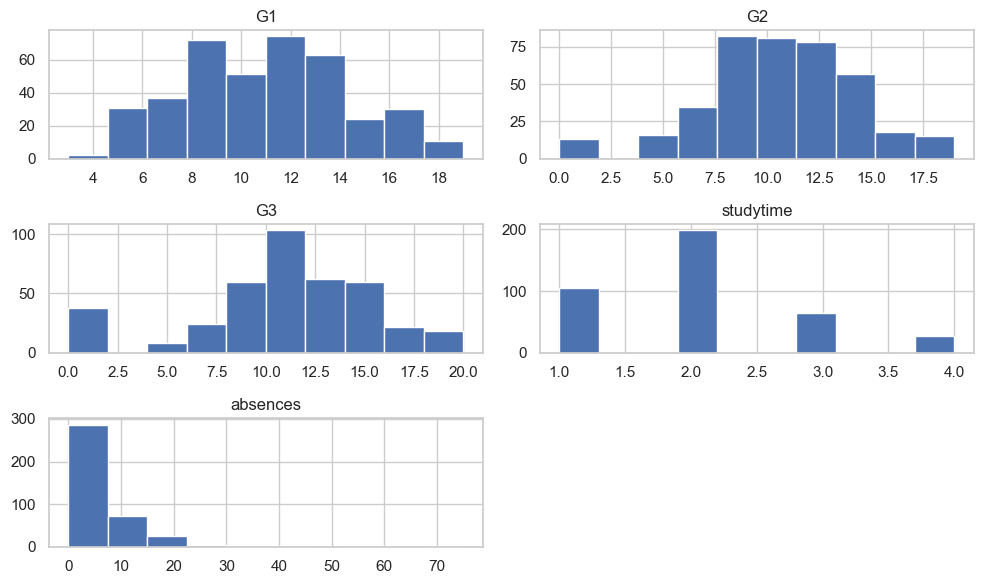

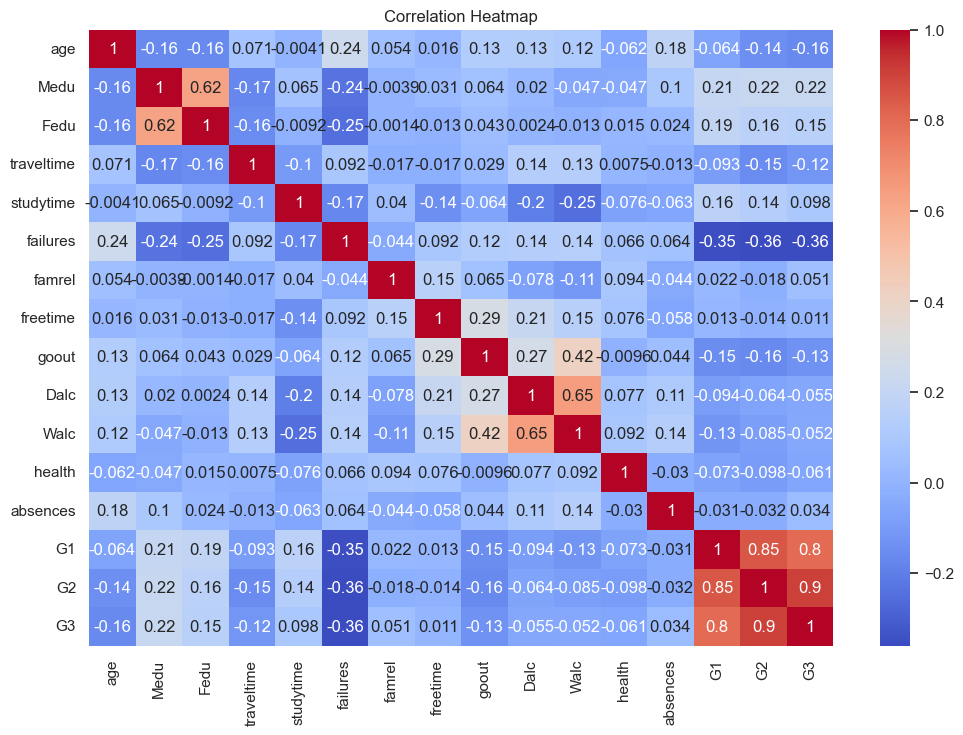

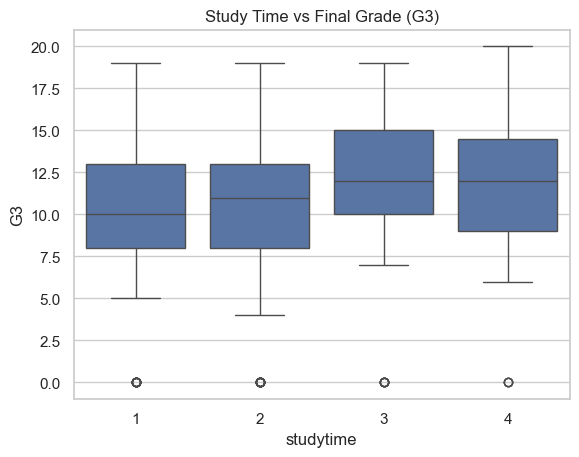

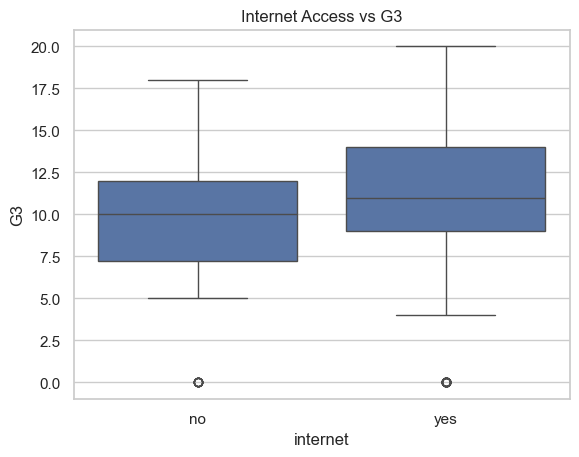

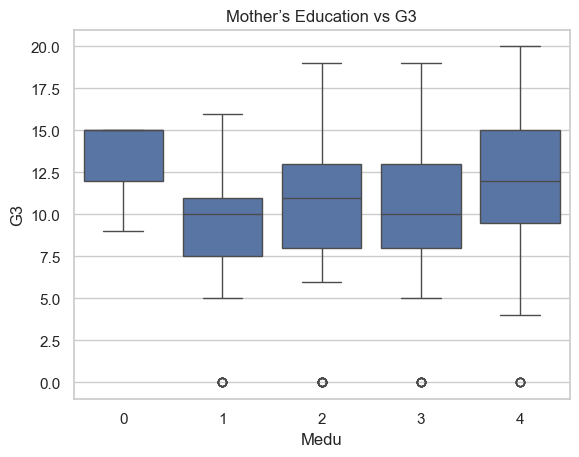

In [4]:
# Exploratory Data Analysis (EDA)
sns.set(style='whitegrid')
df[['G1', 'G2', 'G3', 'studytime', 'absences']].hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

sns.boxplot(x='studytime', y='G3', data=df)
plt.title('Study Time vs Final Grade (G3)')
plt.show()

sns.boxplot(x='internet', y='G3', data=df)
plt.title('Internet Access vs G3')
plt.show()

sns.boxplot(x='Medu', y='G3', data=df)
plt.title('Mother’s Education vs G3')
plt.show()

In [5]:
#Feature Encoding
df_encoded = df.copy()
label_cols = df_encoded.select_dtypes(include='object').columns
encoders = {}

for col in label_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    encoders[col] = le

with open("label_encoders.pkl", "wb") as f:
    pickle.dump(encoders, f)

In [6]:
#Model Building
X = df_encoded.drop('G3', axis=1)
y = df_encoded['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [7]:
#Evaluation
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 1.1050632911392408
MSE: 3.4867417721518983
RMSE: 1.867281920908543
R² Score: 0.8299569015097052


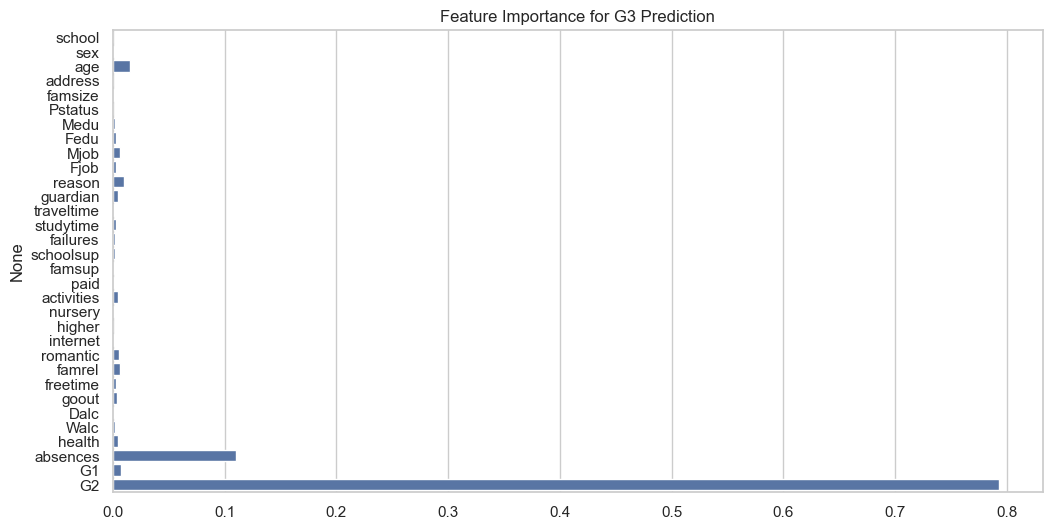

In [8]:
# Feature Importance
importances = model.feature_importances_
feat_names = X.columns
plt.figure(figsize=(12, 6))
sns.barplot(x=importances, y=feat_names)
plt.title("Feature Importance for G3 Prediction")
plt.show()

In [9]:
joblib.dump(model, 'grade_predictor.pkl')

['grade_predictor.pkl']

In [10]:
with open("columns.pkl", "wb") as f:
    pickle.dump(X.columns.tolist(), f)